# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Muhammad Sandi Kuncoro
- Email: muhammad2sandi@gmail.com
- ID Dicoding: muhsandi

## Pertanyaan Bisnis

- Bagaimana Performa Persewaan Sepeda Beberapa Waktu Terakhir
- Seberapa Sering Seorang Pelanggan Melakukan Penyewaan Dalam Beberapa Terakhir

## Menyiapkan semua library yang dibutuhkan

In [83]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

## Data Wrangling

In [84]:
# Importing Data
data_hour = pd.read_csv('data_hour.csv')
data_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [85]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [86]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana Performa Persewaan Sepeda Beberapa Waktu Terakhir

In [87]:
# Mengganti nama kolom menjadi nama yang lebih mudah dibaca
data_hour.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

# Mengatur tipe data yang tepat
# Konversi tanggal
data_hour['datetime'] = pd.to_datetime(data_hour.datetime)

# Variabel kategori
data_hour['season'] = data_hour.season.astype('category')
data_hour['is_holiday'] = data_hour.is_holiday.astype('category')
data_hour['weekday'] = data_hour.weekday.astype('category')
data_hour['weather_condition'] = data_hour.weather_condition.astype('category')
data_hour['is_workingday'] = data_hour.is_workingday.astype('category')
data_hour['month'] = data_hour.month.astype('category')
data_hour['year'] = data_hour.year.astype('category')
data_hour['hour'] = data_hour.hour.astype('category')

Plotting

In [88]:
# Mengkonfigurasi plotting visual dan ukuran
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Distribusi musim hitungan per jam')]

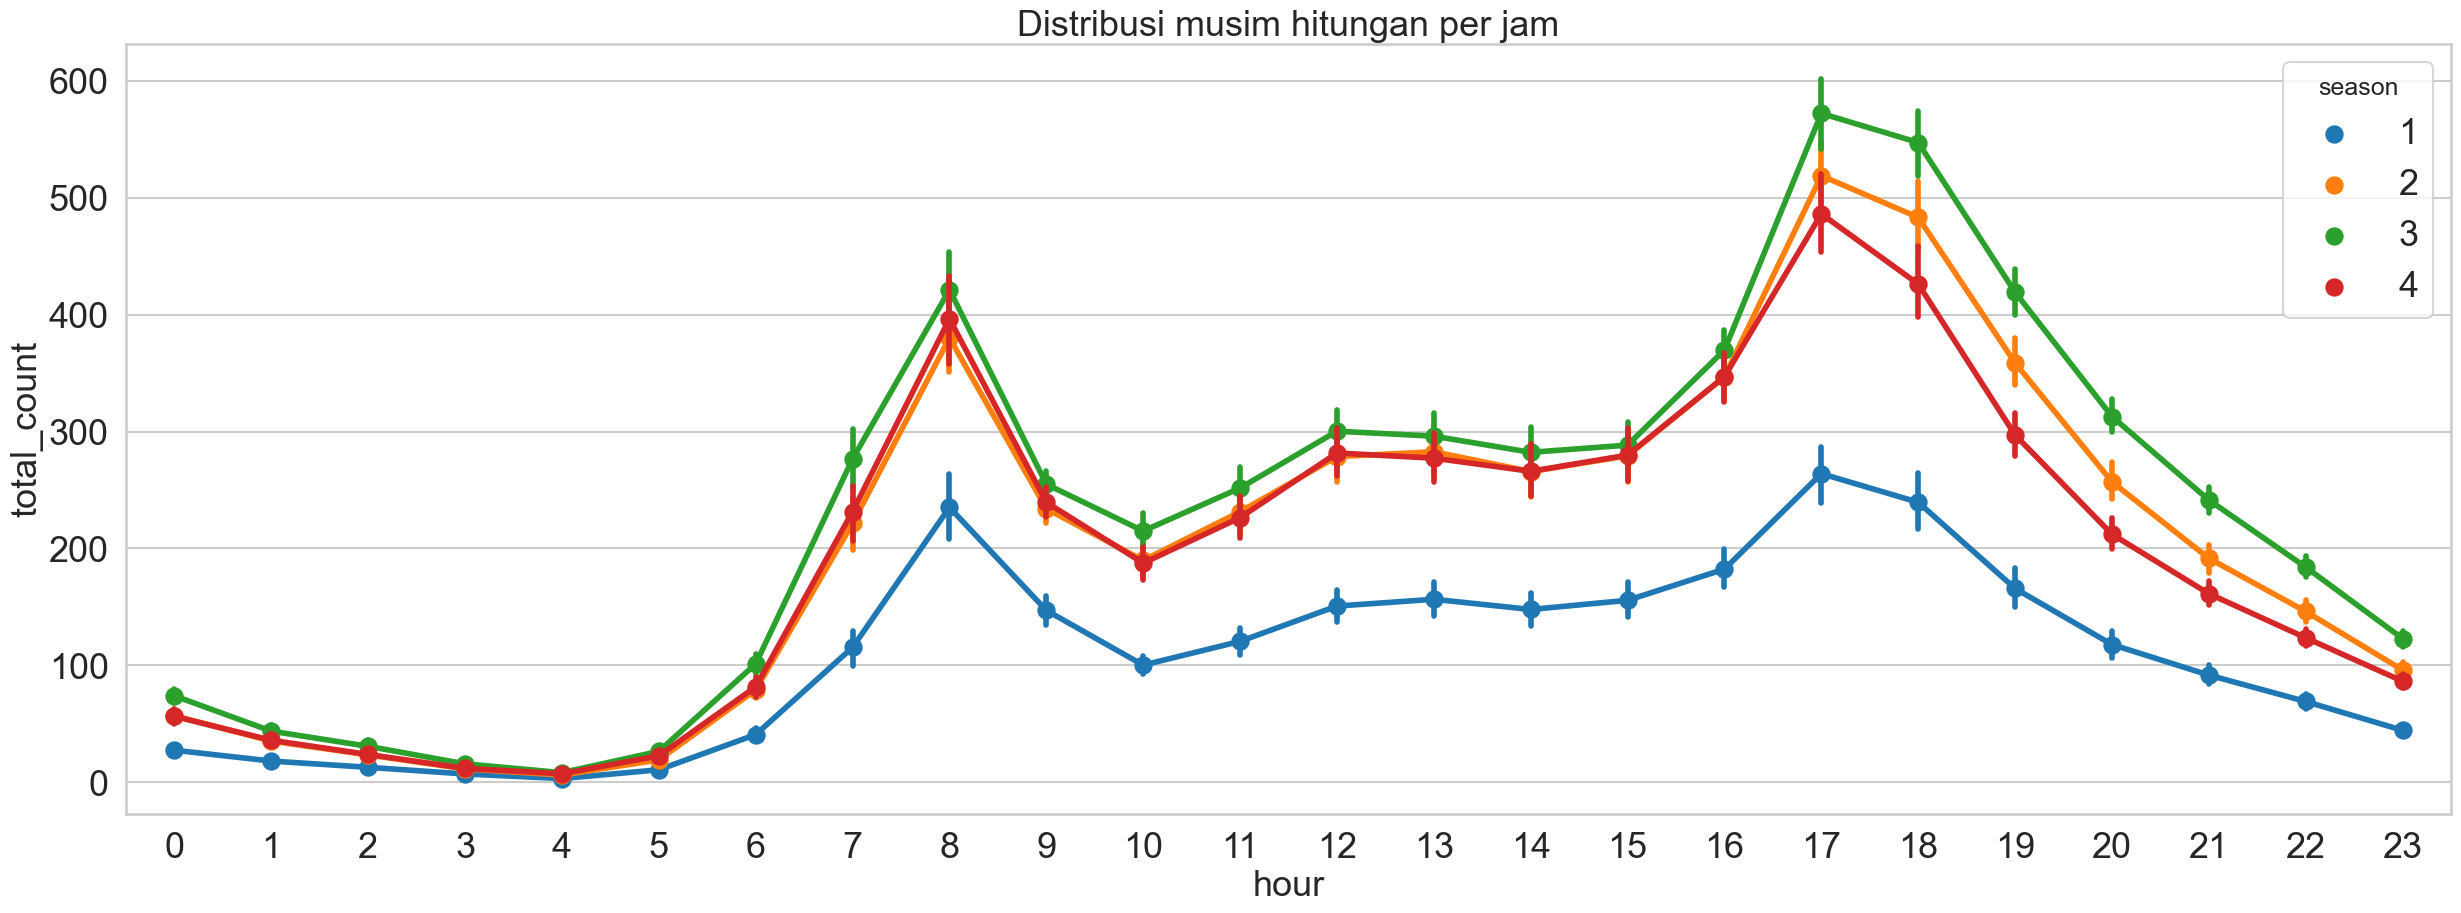

In [89]:
fig,ax = plt.subplots()
sns.pointplot(data=data_hour[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Distribusi musim hitungan per jam")

[Text(0.5, 1.0, 'Distribusi hitungan per jam pada hari dalam seminggu')]

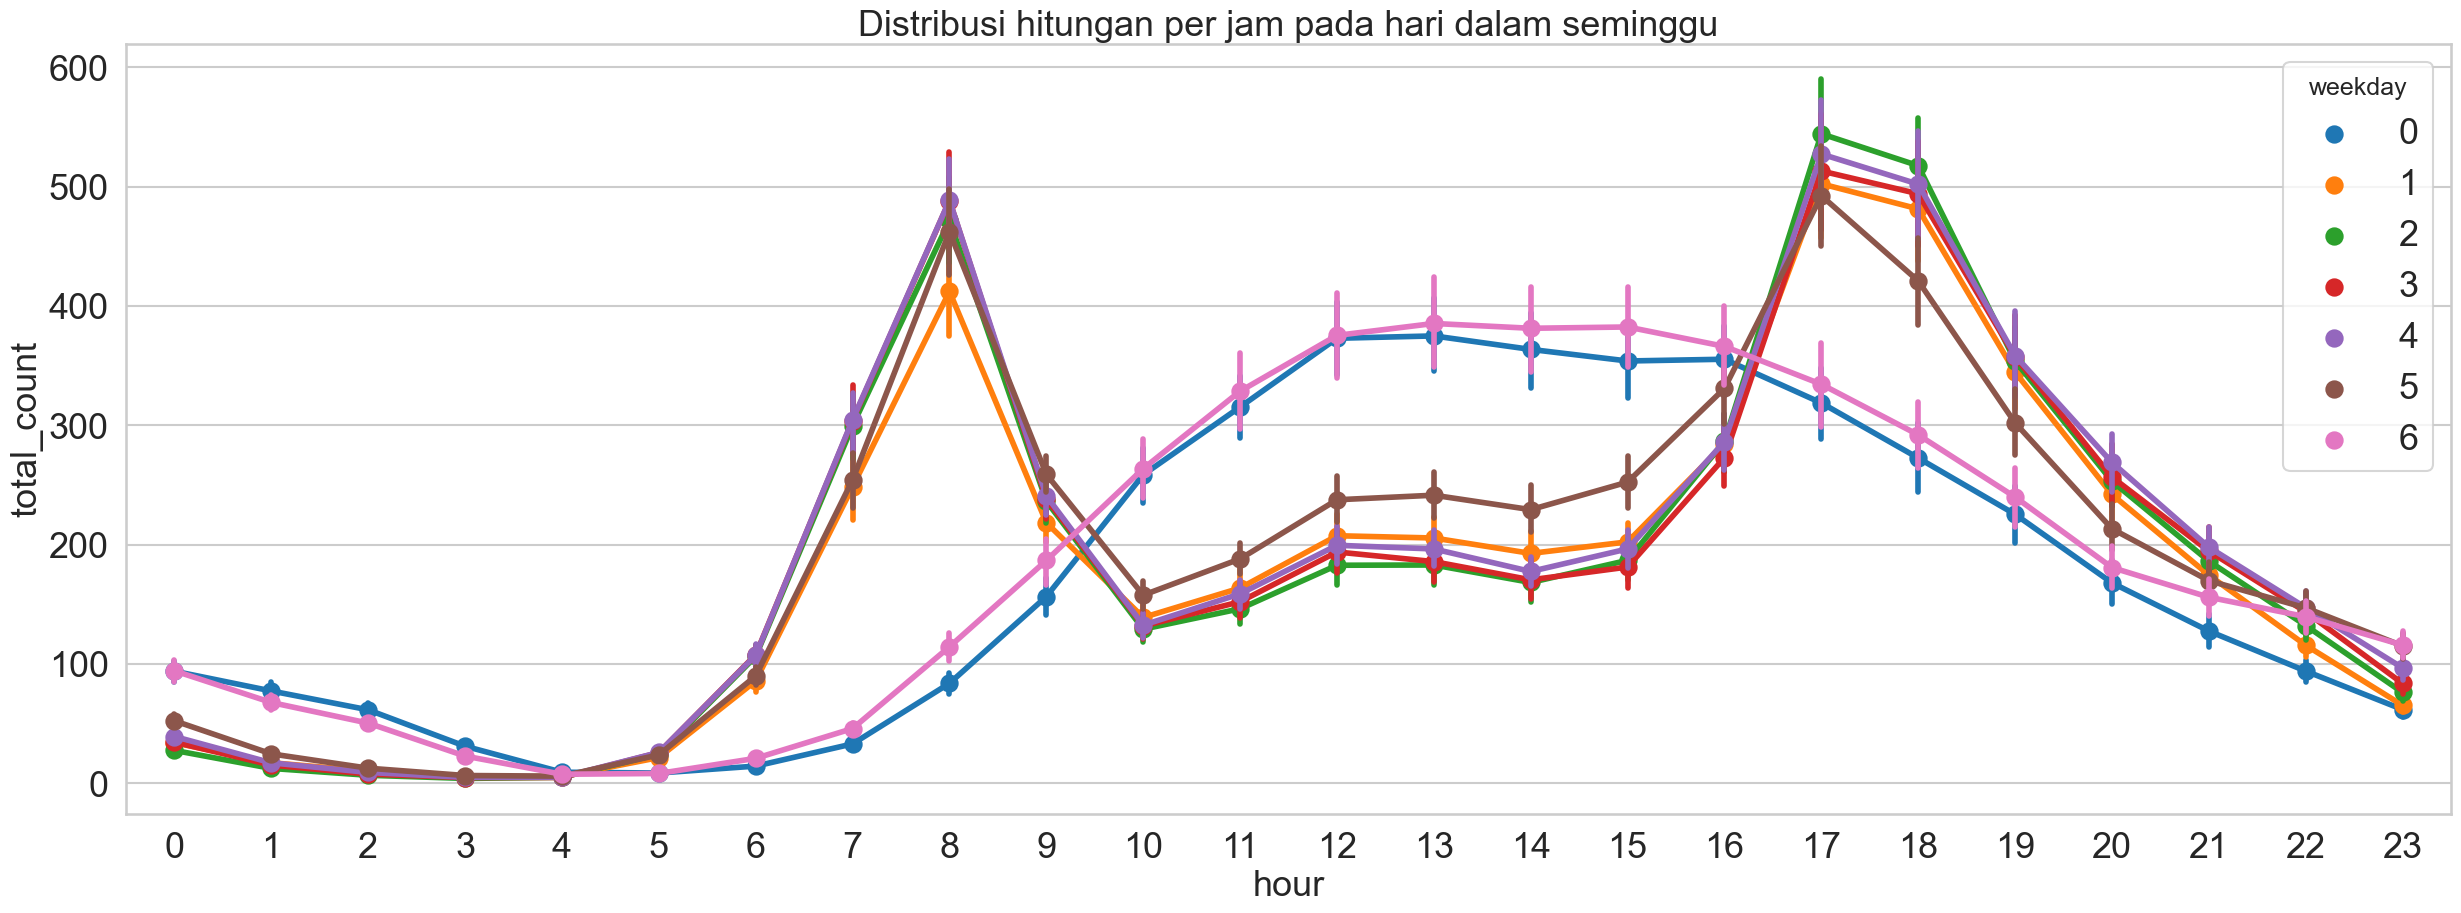

In [91]:
fig,ax = plt.subplots()
sns.pointplot(data=data_hour[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Distribusi hitungan per jam berdasarkan hari dalam seminggu")

## Interpretasi: 
Plot Poin menunjukan bahwa penyewa sepeda tertinggi terdapat saat musim gugur dan yang paling rendah saat musim semi. Orang biasa menyewa sepada saat hari kerja (1-5/senin-jumat) pada jam 8 pagi dan jam 5 sore, sedangkan saat akhir pekan rata-rata orang biasa menyewa sepeda mulai jam 11 siang sampai jam 5 sore. Hal ini mungkin menunjukkan bahwa sebagian besar pengguna jasa persewaan sepeda menggunakan sepeda untuk berangkat dan pulang kerja atau sekolah

[Text(0.5, 1.0, 'Distribusi hitungan bulanan')]

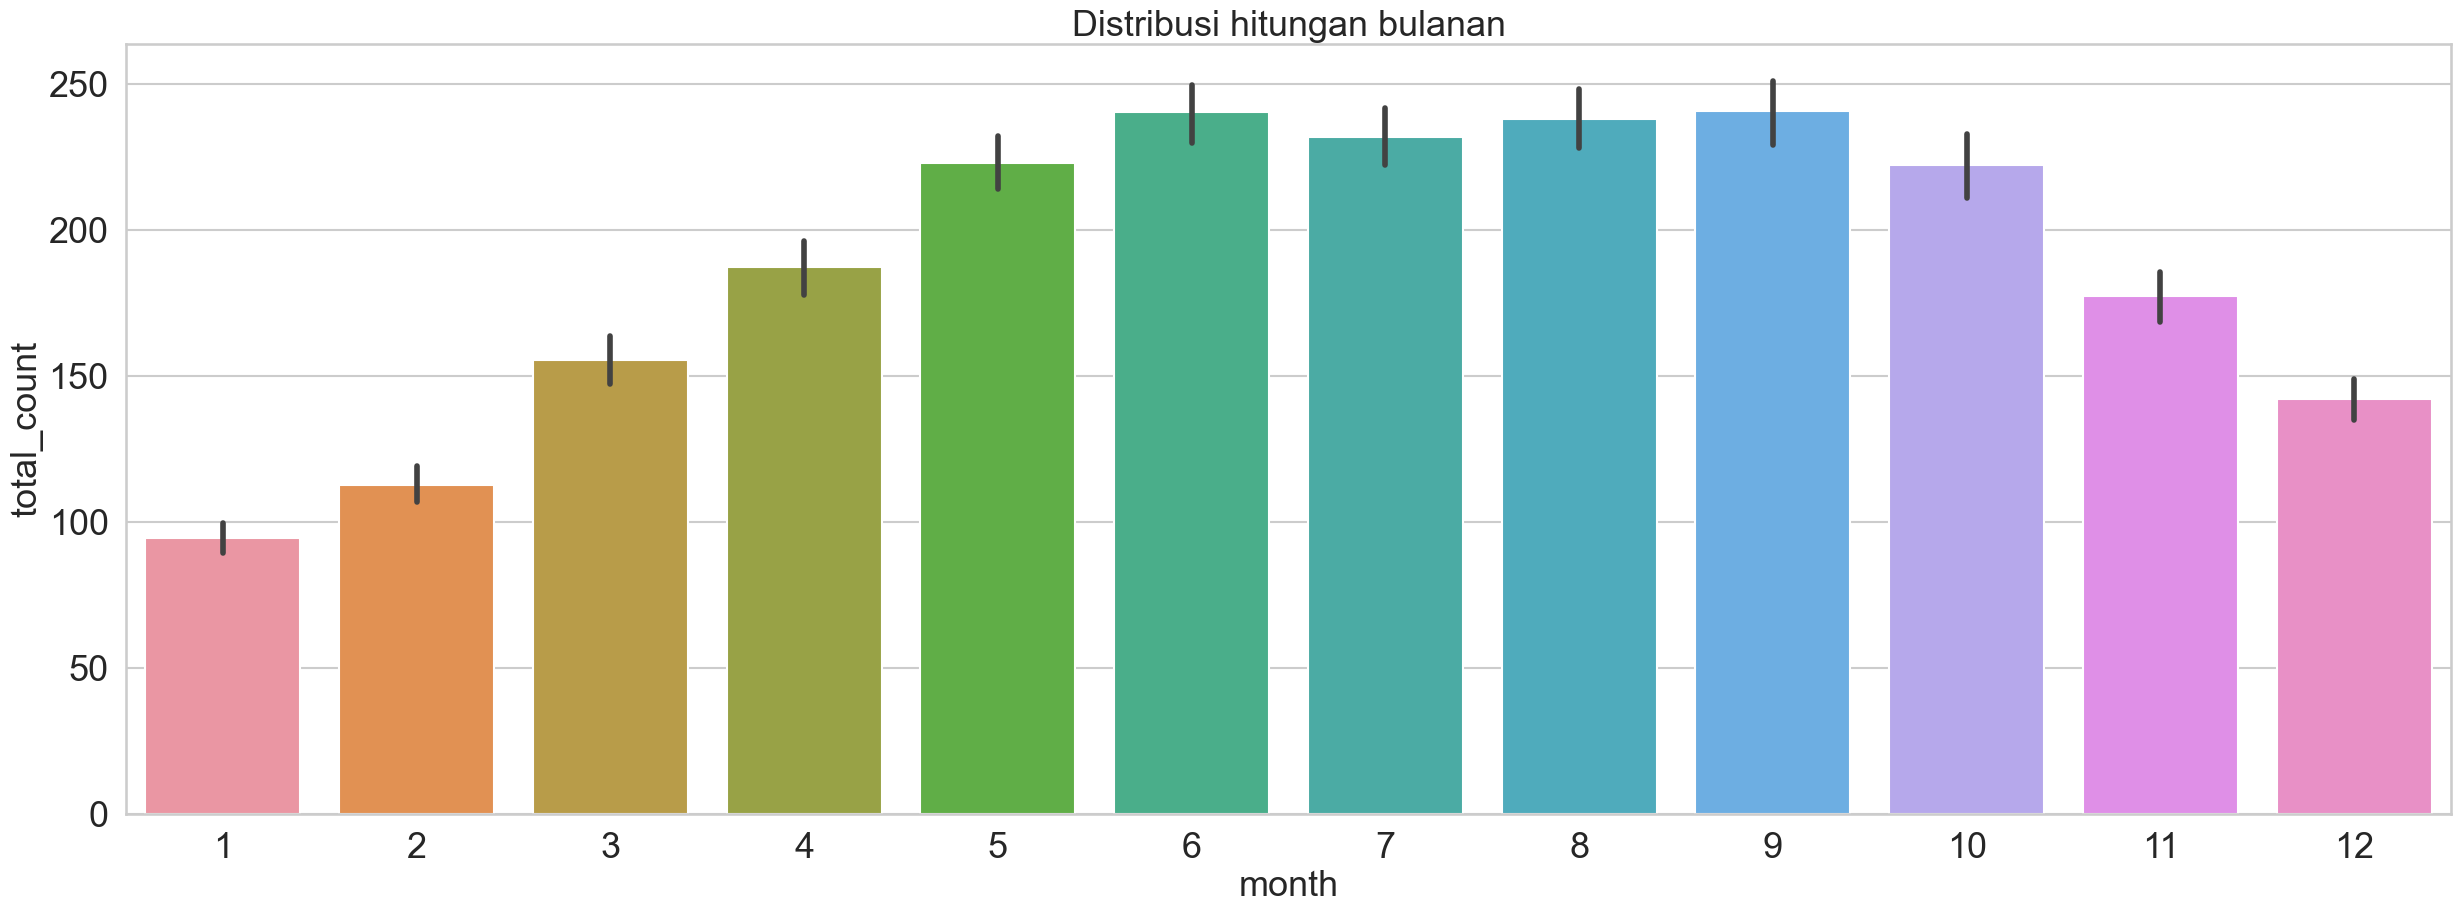

In [66]:
fig,ax = plt.subplots()
sns.barplot(data=data_hour[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Distribusi hitungan bulanan")

Interpretasi: Pengguna persewaan sepeda tertinggi ada pada bulan juni sampai september, sementara yang terendah ada pada bulan januari dan februari

[Text(0.5, 1.0, 'Distribusi hitungan musiman')]

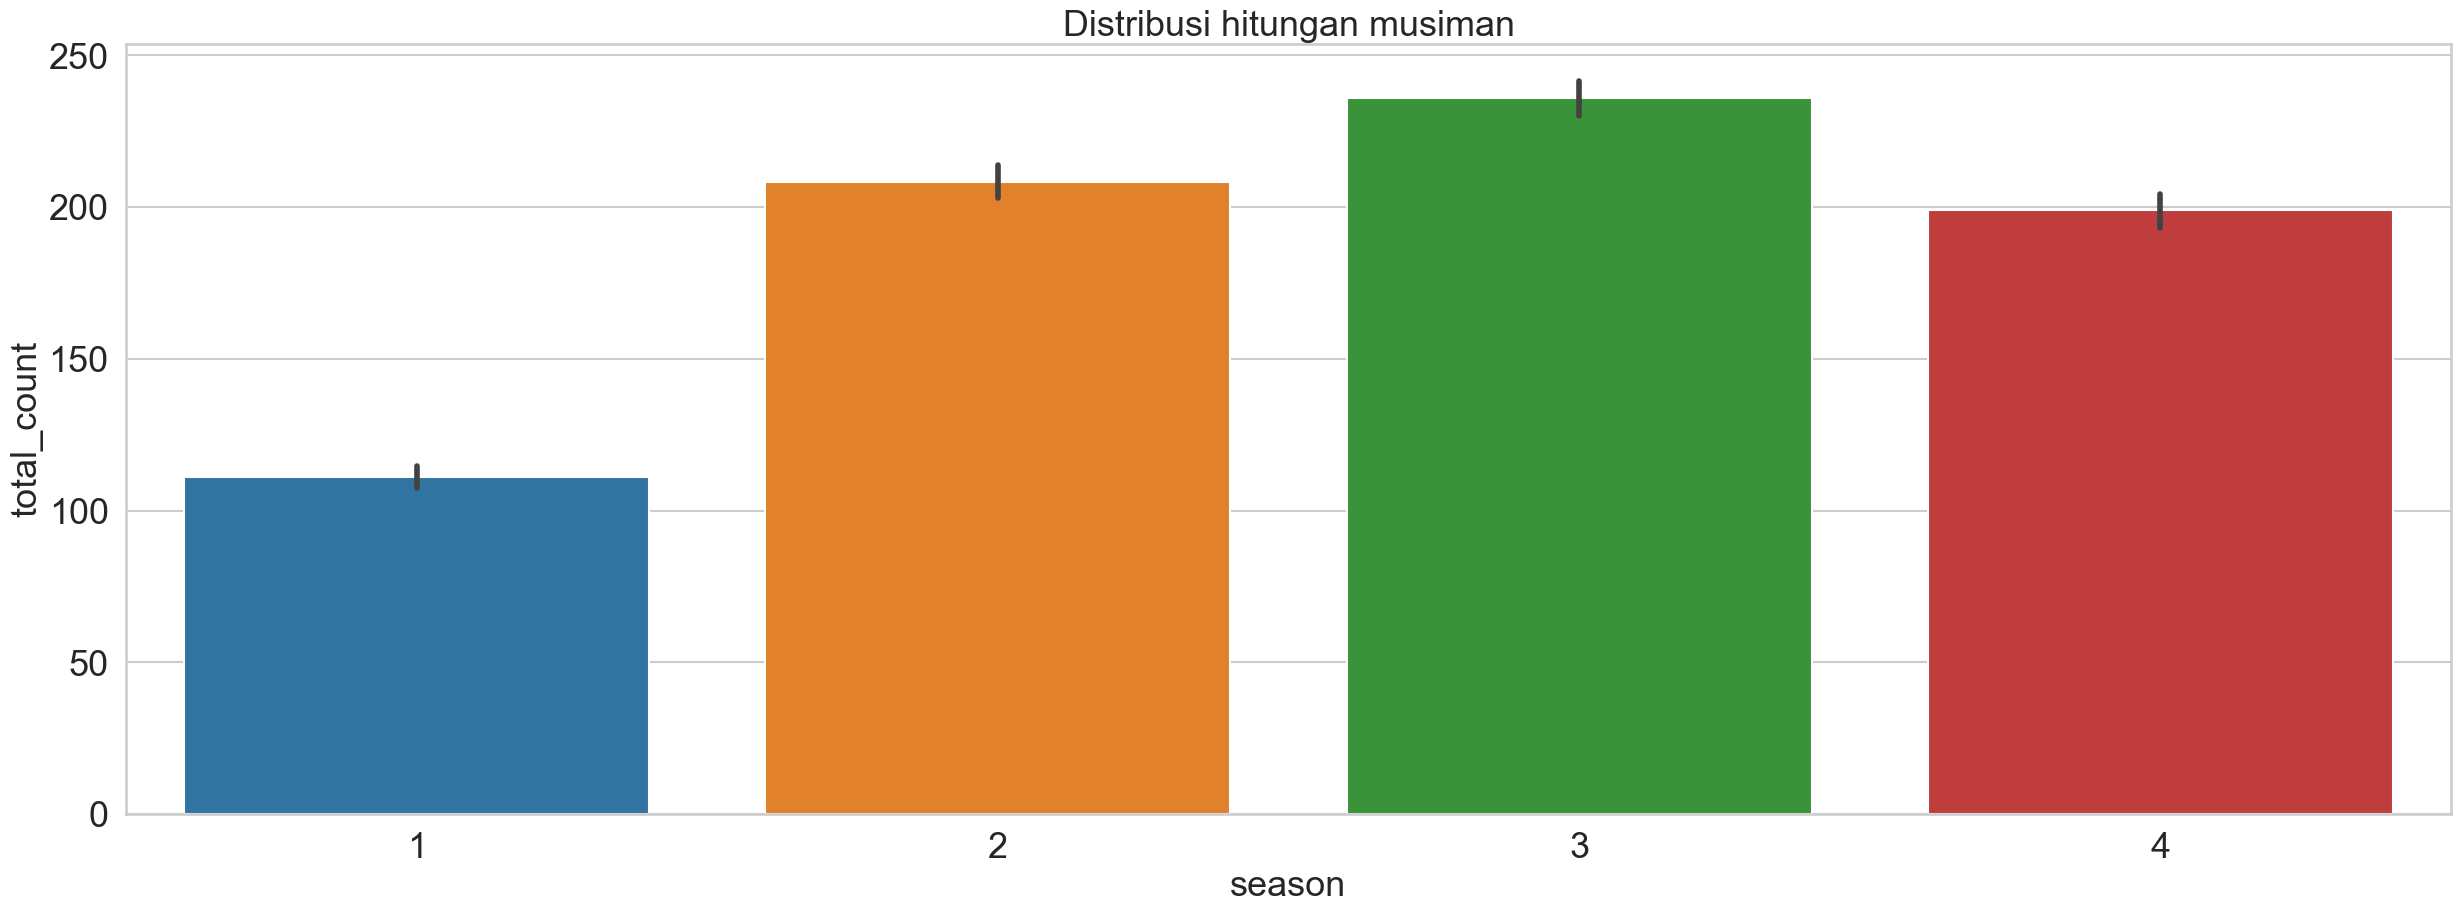

In [67]:
fig,ax = plt.subplots()
sns.barplot(data=data_hour[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Distribusi hitungan musiman")

Interpretasi: Pengguna persewaan sepeda tertinggi yaitu saat musim gugur dan yang paling rendah adalah musim semi

## Frekuensi Jumlah Sewa Harian

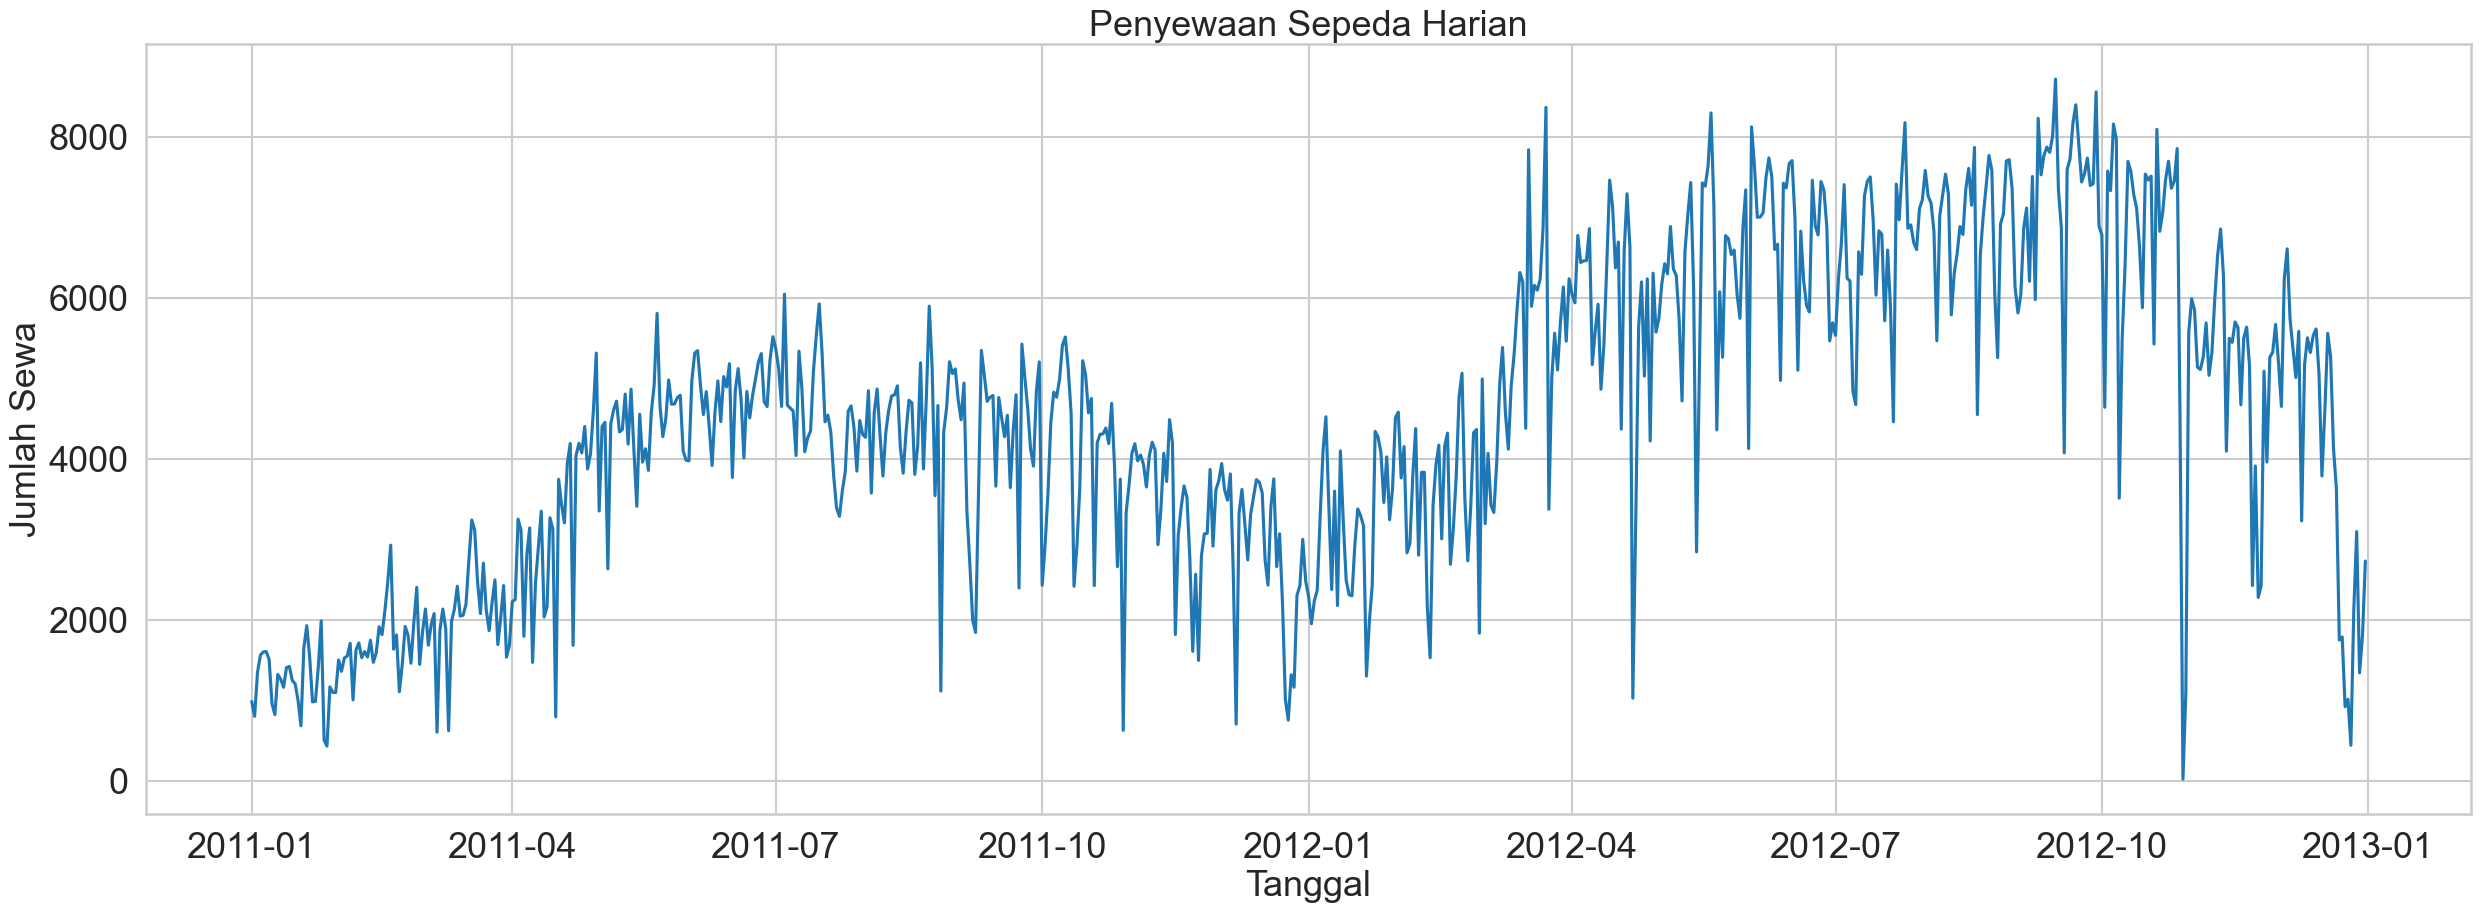

In [68]:
# Mengubah format datetime
data_hour['datetime'] = pd.to_datetime(data_hour['datetime'])

# Agregat data setiap hari
daily_rentals = data_hour.resample('D', on='datetime')['total_count'].sum()

# Membuat plot garis persewaan sepeda harian
sns.lineplot(data=daily_rentals)

# Set the x-axis label and title
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.title('Penyewaan Sepeda Harian')

# Menampilkan plot
plt.show()

In [69]:
daily_rentals.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total_count, dtype: float64

## Rata-rata Penyewaan Sepeda Per Jam berdasarkan Hari dalam Seminggu

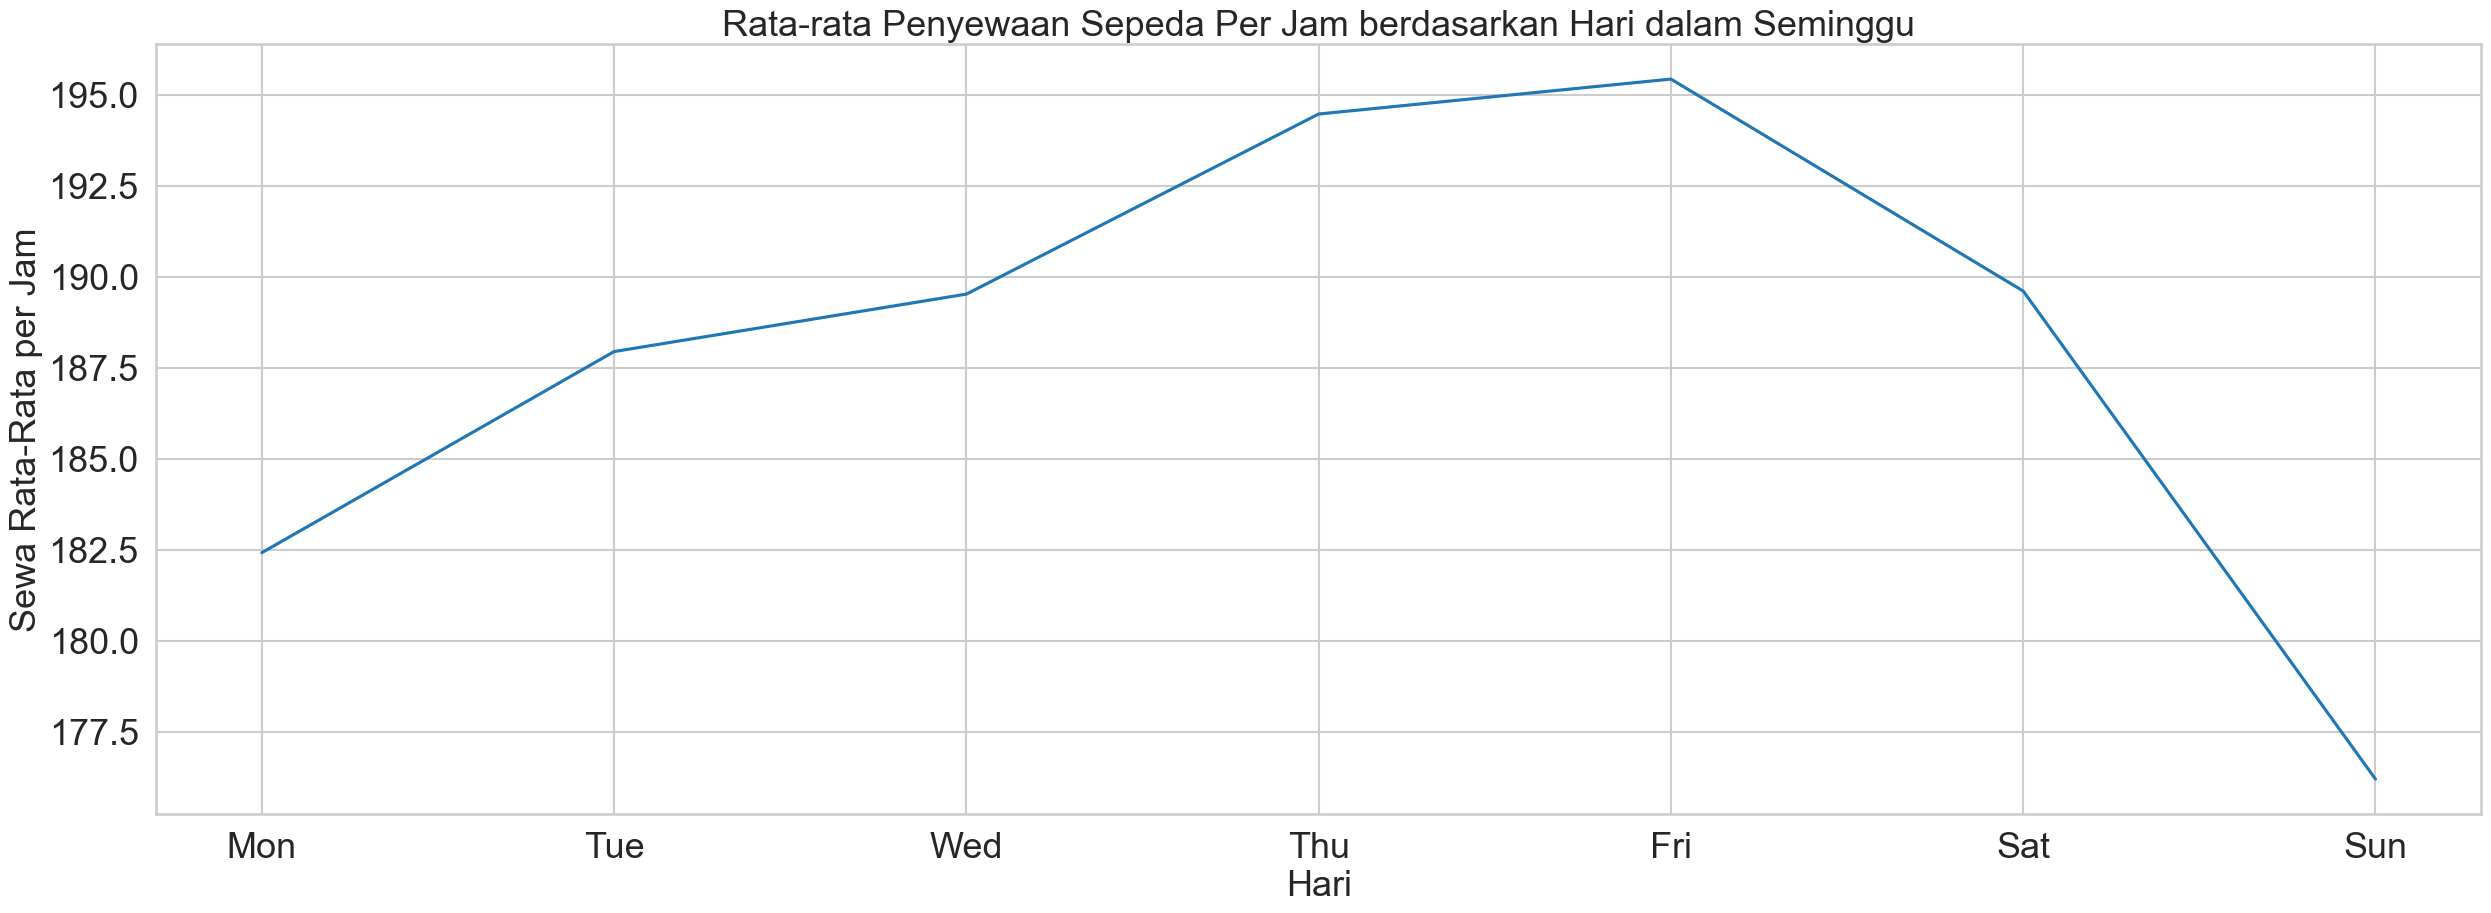

In [70]:
hourly_rentals = data_hour.resample('H', on='datetime')['total_count'].sum()

# Menghitung sewa rata-rata per jam untuk setiap hari dalam seminggu
avg_rentals = hourly_rentals.groupby(hourly_rentals.index.dayofweek).mean()

# Membuat line chart rata-rata persewaan sepeda per jam berdasarkan hari dalam seminggu
plt.plot(avg_rentals.index, avg_rentals)

# Set the title and axis labels
plt.title('Rata-rata Penyewaan Sepeda Per Jam berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Sewa Rata-Rata per Jam')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Menampilkan plot
plt.show()

[Text(0.5, 1.0, 'Distribusi hitungan tahun')]

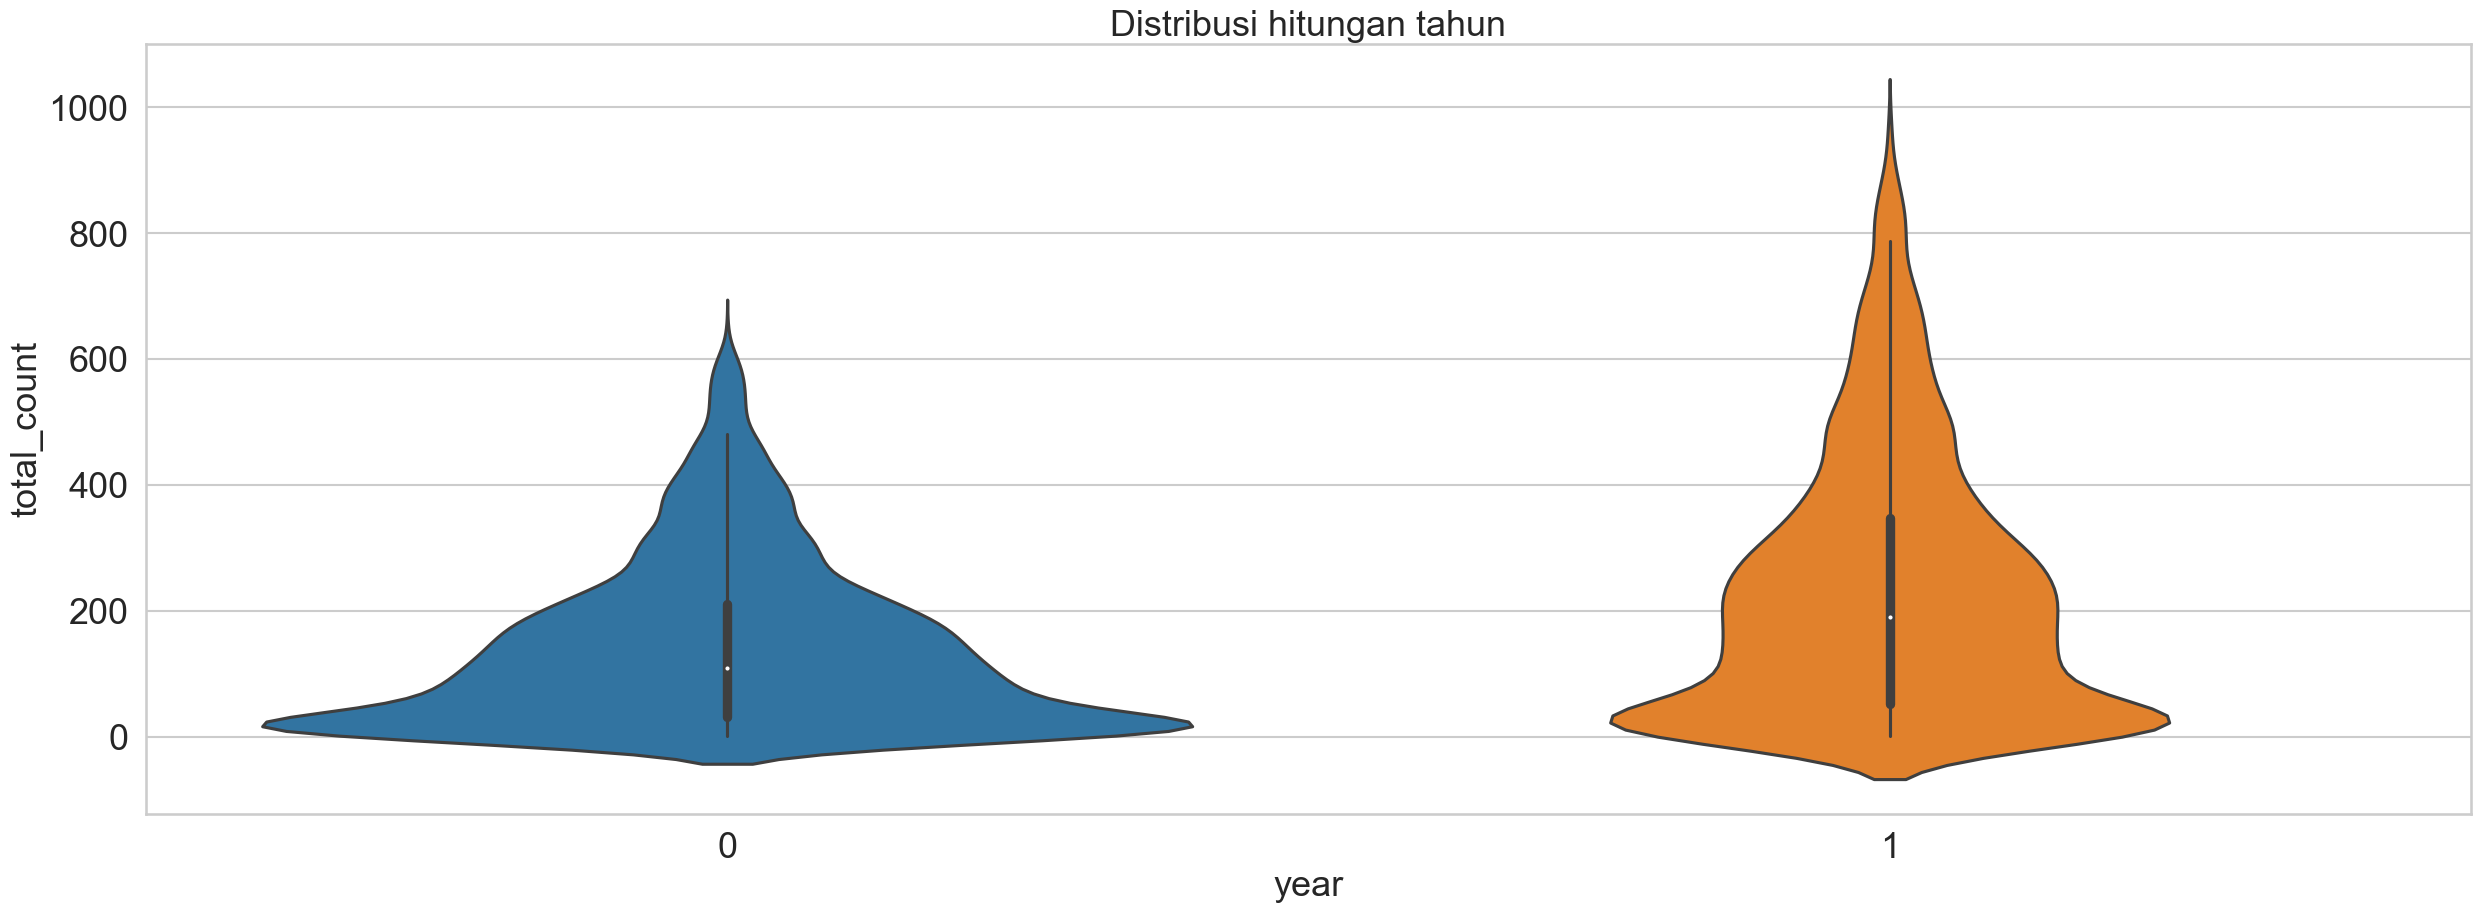

In [71]:
fig,ax = plt.subplots()
sns.violinplot(data=data_hour[['year',
                           'total_count']],
              x='year',
              y='total_count',
              ax=ax)
ax.set(title="Distribusi hitungan tahun")

Interpretasi: Dari segi total count tahun 2012 lebih unggul dari tahun 2011

<Axes: >

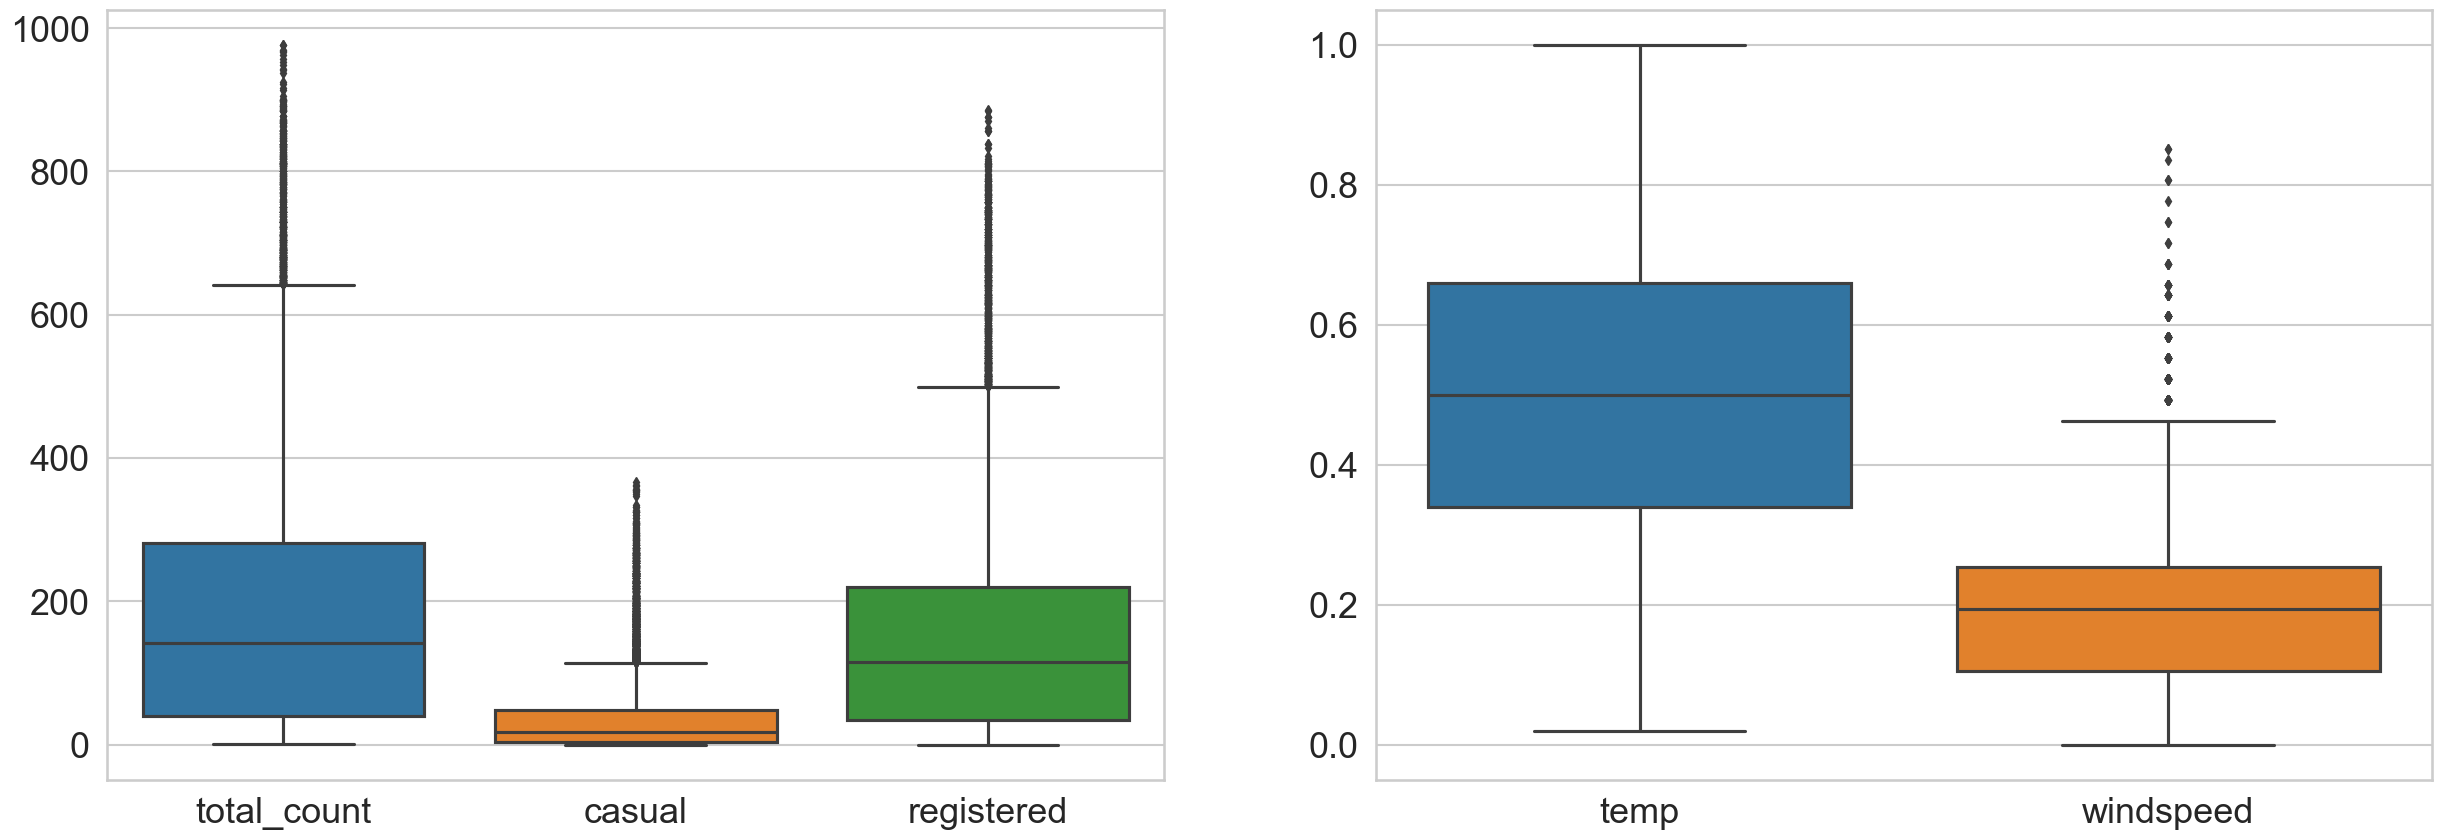

In [72]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=data_hour[['total_count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=data_hour[['temp',
                          'windspeed']],ax=ax2)

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

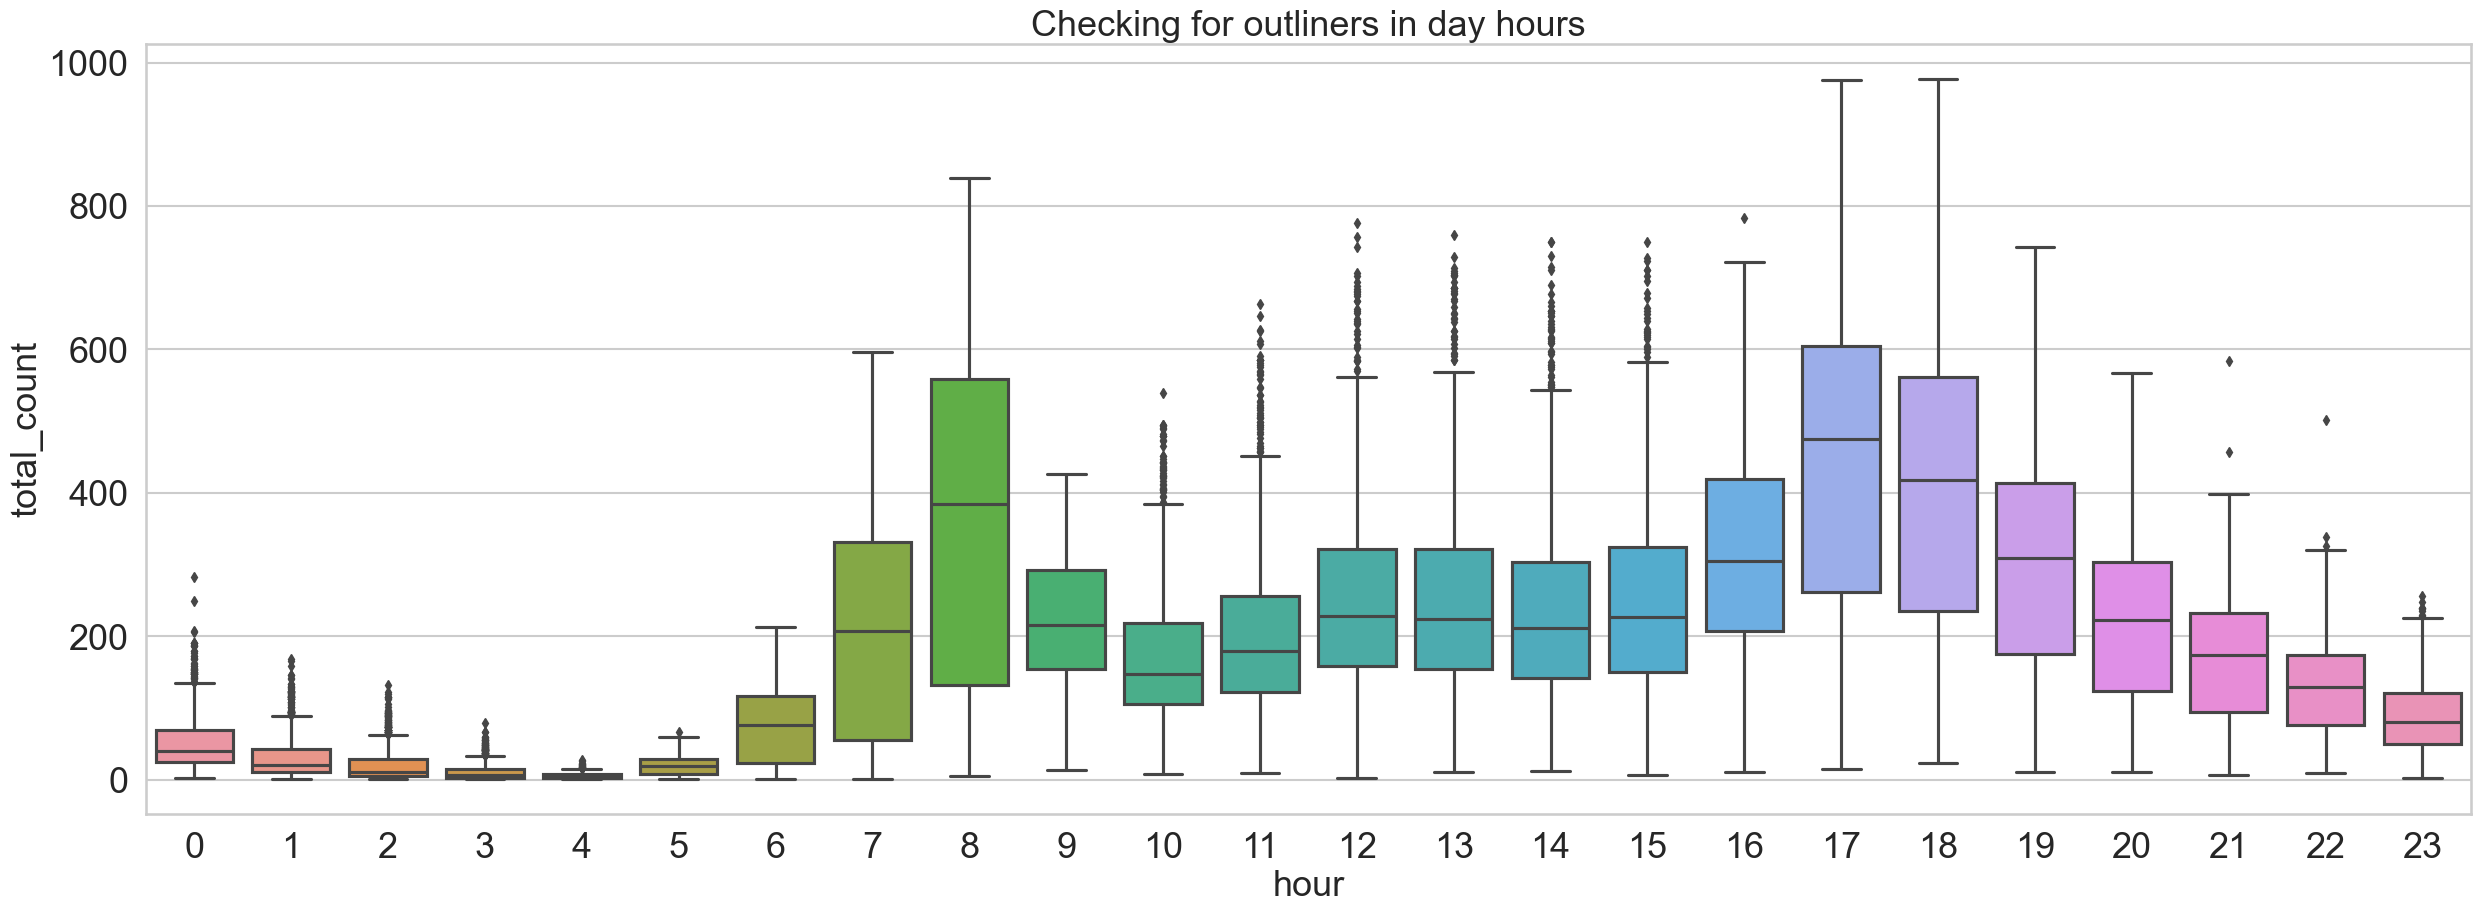

In [73]:
fig,ax = plt.subplots()
sns.boxplot(data=data_hour[['total_count',
                          'hour']],x='hour',y='total_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

## Korelasi

<Axes: >

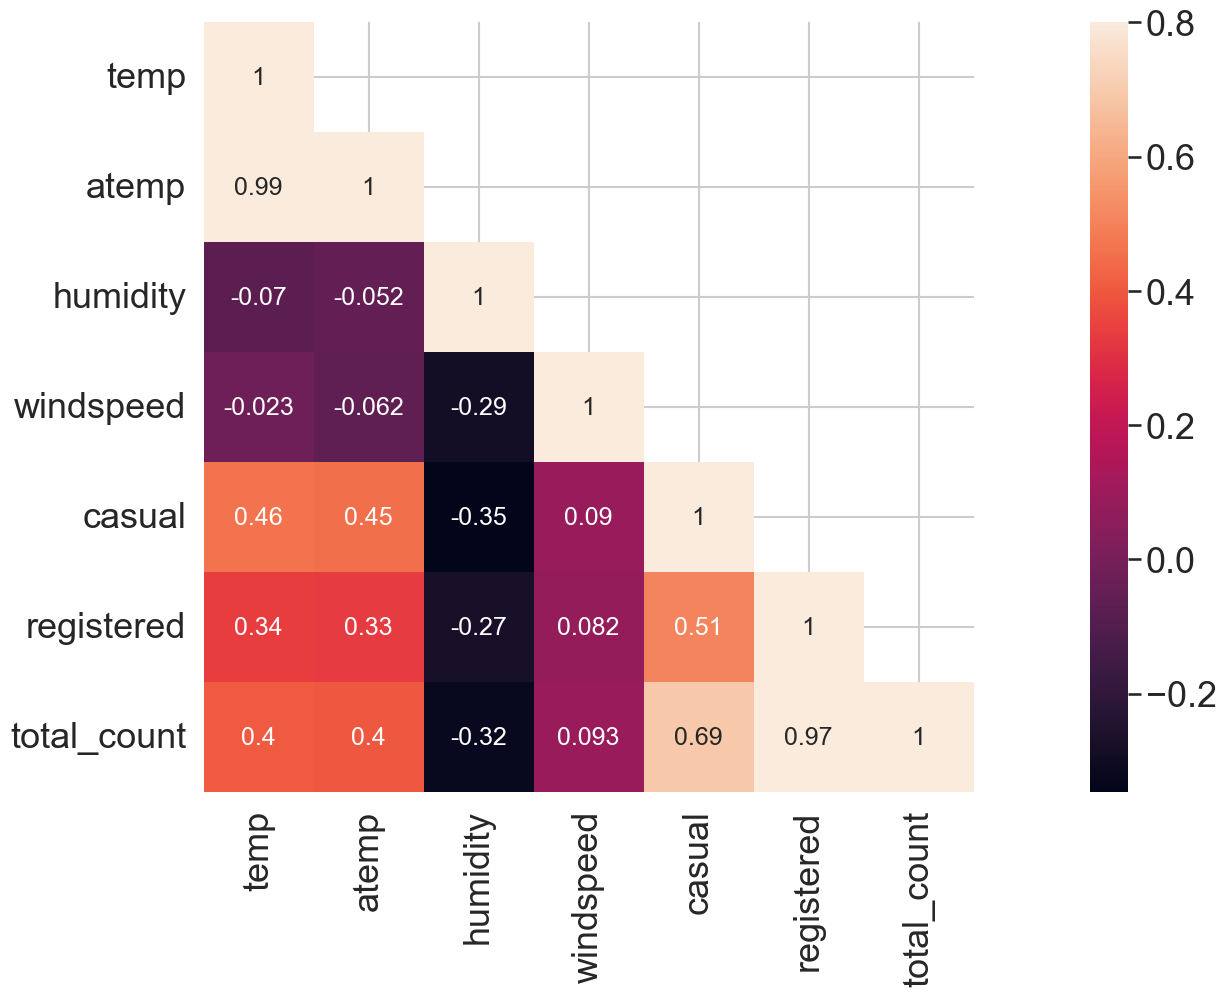

In [74]:
corrMatt = data_hour[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']].corr()

mask = np.array(corrMatt)
# Mengubah segitiga bawah array menjadi false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

Kesimpulan:

- Variabel "temp" dan "atemp" berkorelasi kuat. Ini bisa terjadi ketika kondisi lingkungan seperti kelembaban, kecepatan angin, atau efek lainnya mempengaruhi persepsi seseorang terhadap suhu yang dirasakan.
- Variabel "registered" dan "total_count" berkorelasi kuat, Hal ini dapat diartikan bahwa semakin banyak registered users, semakin banyak pula total count.
- Sementara variabel "casual" berkorelasi cukup terhadap variabel "total_count"

In [94]:
data_hour.to_csv("bike-sharing-dataset.csv", index=False)